<a href="https://colab.research.google.com/github/dunguyenforever/Perceptron-DeltaRule/blob/main/MachineLearning_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Du Nguyen and Thanh Nguyen contributed equally to the assignment
# via equal division of programming, code review and documentation

In [162]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [163]:
class PerceptronDeltaRule:
    def __init__(self, learning_rate=0.01):
        self.learning_rate = learning_rate
        self.weights = np.random.randn(3)  # 2 for inputs and 1 for bias

    def net_input(self, X):
        X_with_bias = np.hstack((X, np.ones((X.shape[0], 1))))
        return X_with_bias @ self.weights

    def predict(self, X):
        return (self.net_input(X) >= 0).astype(int)

    def train_batch(self, X, y, epochs=100):
        X_with_bias = np.hstack((X, np.ones((X.shape[0], 1))))  # Add bias term
        errors = []
        weight_updates_counter = 0  # Initialize weight updates counter

        for epoch in range(epochs):
            y_hat = self.predict(X)
            error = y - y_hat
            E = 0.5 * np.sum(error ** 2)  # Sum of squared errors
            errors.append(E)

            # Update weights and increment counter
            self.weights += self.learning_rate * X_with_bias.T @ error  # Batch update
            weight_updates_counter += 1  # Each epoch corresponds to one batch update

        return errors, weight_updates_counter


    def train_incremental(self, X, y, epochs=100):
        X_with_bias = np.hstack((X, np.ones((X.shape[0], 1))))
        errors = []
        weight_updates_counter = 0

        for epoch in range(epochs):
            E = 0
            for i in range(X.shape[0]):
                prediction = self.predict(X[i:i+1])[0]
                error = y[i] - prediction
                self.weights += self.learning_rate * error * X_with_bias[i]
                E += 0.5 * error ** 2
                weight_updates_counter += 1
            errors.append(E)

        return errors, weight_updates_counter

    def train_batch_with_decay(self, X, y, epochs=100, decay_factor=0.8):
        X_with_bias = np.hstack((X, np.ones((X.shape[0], 1))))  # Including additional bias term
        errors = []
        learning_rate = self.learning_rate
        self.learning_rates_history = []

        for epoch in range(epochs):
            predictions = self.predict(X)
            error = y - predictions
            E = 0.5 * np.sum(error ** 2)  # Sum of Squared Error
            errors.append(E)
            self.weights += learning_rate * X_with_bias.T @ error
            learning_rate *= decay_factor
            self.learning_rates_history.append(learning_rate)

        return errors

    def calculate_error(self, X, y): # Sum of Squared Error
        predictions = self.predict(X)
        error = y - predictions
        return 0.5 * np.sum(error ** 2)

    def train_with_adaptive_rates(self, X, y, epochs=100, initial_rate=0.3, threshold=0.03, d=0.9, D=1.02):
        X_with_bias = np.hstack((X, np.ones((X.shape[0], 1))))
        errors = []
        learning_rate = initial_rate
        previous_error = self.calculate_error(X, y)
        self.learning_rates_history = []

        for epoch in range(epochs):
            self.learning_rates_history.append(learning_rate)
            predictions = self.predict(X)
            prev_weights = self.weights.copy()
            error = y - predictions
            E = 0.5 * np.sum(error ** 2)
            errors.append(E)

            if E > previous_error + threshold:
                learning_rate *= d
                self.weights = prev_weights
                error = previous_error
            else:
                learning_rate *= D
                self.weights += learning_rate * X_with_bias.T @ error

            previous_error = E

        return errors


    def plot_decision_surface(self, X, y, title):
        x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
        y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)

        plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
        plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
        plt.title(title)
        plt.xlabel("x1")
        plt.ylabel("x2")
        plt.show()


In [164]:
# Dataset generation function
def data_generation(num_samples=500):
    x1 = np.random.uniform(-1, 1, num_samples)
    x2 = np.random.uniform(-1, 1, num_samples)
    X = np.vstack((x1, x2)).T
    y = (x1 + 3 * x2 - 2 > 0).astype(int)
    return X, y

# Generate the dataset
X, y = data_generation()

# Initialize learning rates to test
learning_rates = [1e-4, 1e-3, 0.05, 0.1]

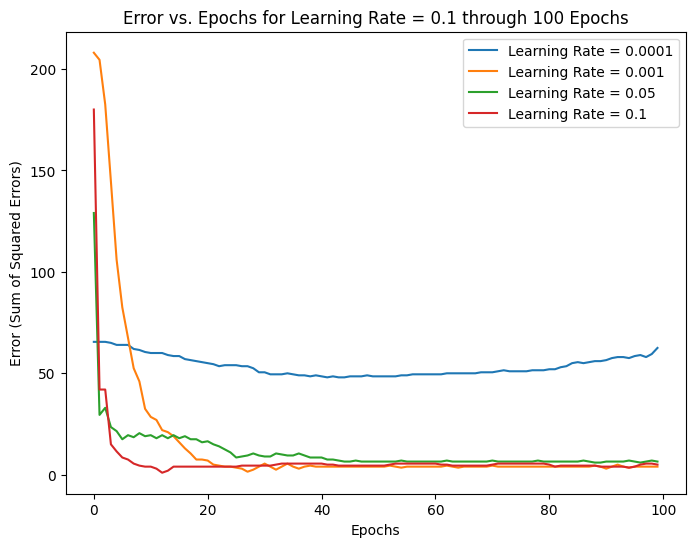

In [165]:
# Problem 1: a) Plot Error vs Epochs for each learning rate through 100 epochs
plt.figure(figsize=(8, 6))
for lr in learning_rates:
    perceptron = PerceptronDeltaRule(learning_rate=lr)
    errors, weight_updates_batch= perceptron.train_batch(X, y, epochs=100)
    plt.plot(errors, label=f'Learning Rate = {lr}')
plt.xlabel("Epochs")
plt.ylabel("Error (Sum of Squared Errors)")
plt.legend()
plt.title(f'Error vs. Epochs for Learning Rate = {lr} through 100 Epochs')
plt.show()


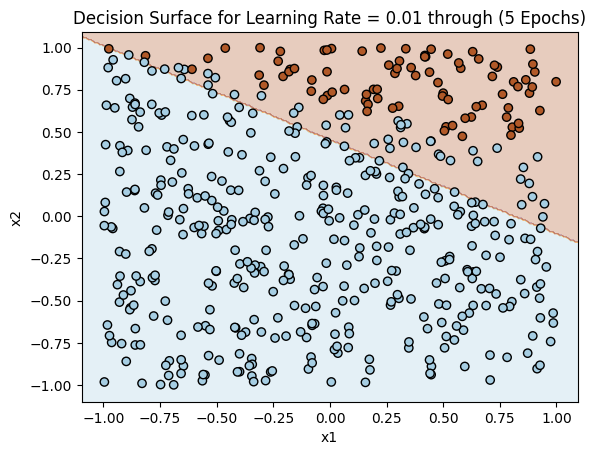

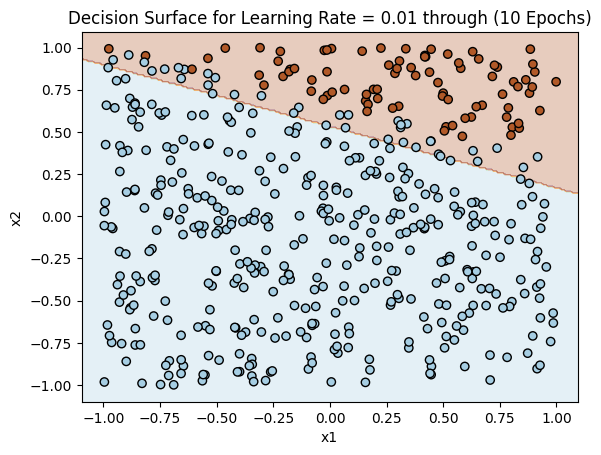

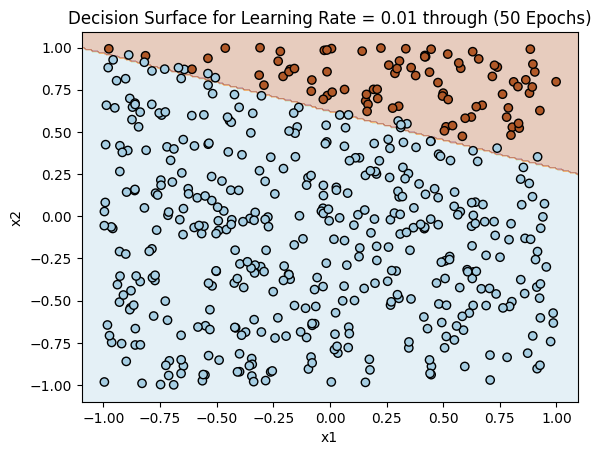

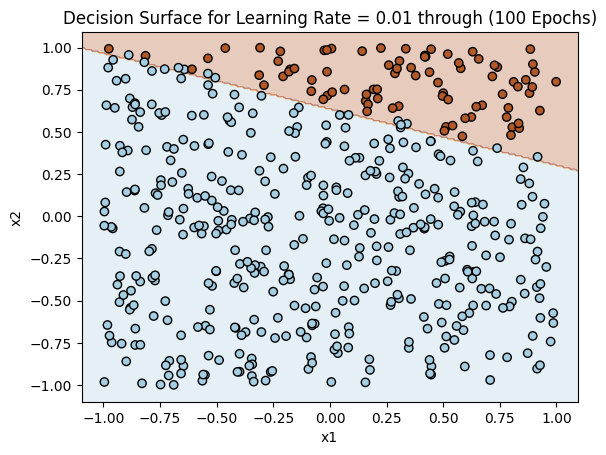

In [166]:
# Problem 1: b) Plot Decision Surfaces at 5, 10, 50, and 100 epochs
epochs_to_plot = [5, 10, 50, 100]
perceptron = PerceptronDeltaRule(learning_rate=0.01)
for epochs in epochs_to_plot:
    perceptron.train_batch(X, y, epochs=epochs)
    perceptron.plot_decision_surface(X, y, title=f"Decision Surface for Learning Rate = 0.01 through ({epochs} Epochs)")

In [167]:
# Problem 1: c) Testing different Learning Rates
print("Analysis of learning rates:")
for lr in learning_rates:
    perceptron = PerceptronDeltaRule(learning_rate=lr)
    errors, weight_updates_counter = perceptron.train_batch(X, y, epochs=100)
    print(f"Learning Rate: {lr}, Final Error: {errors[-1]}")

Analysis of learning rates:
Learning Rate: 0.0001, Final Error: 55.5
Learning Rate: 0.001, Final Error: 0.0
Learning Rate: 0.05, Final Error: 4.0
Learning Rate: 0.1, Final Error: 4.0


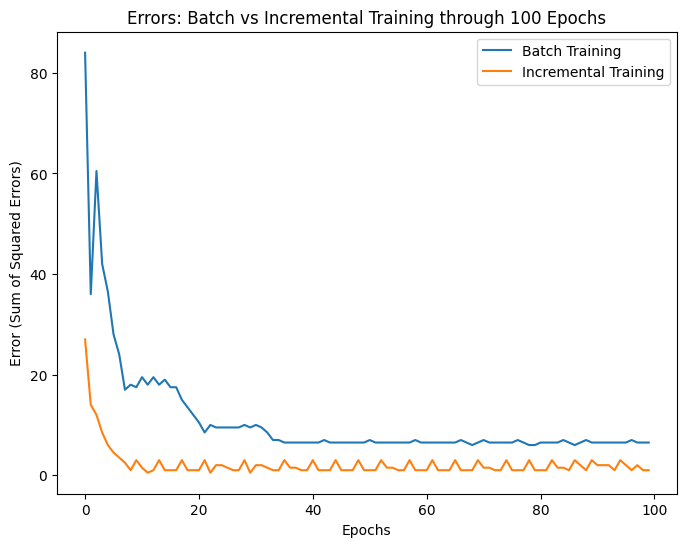

Batch Training Time: 0.003195 seconds
Batch Training Weight Updates: 100
Incremental Training Time: 0.413930 seconds
Incremental Training Weight Updates: 50000


In [168]:
# Problem 1: d) Total Execution time and number of weight updates
def training_timer(train_type, lr=0.01):
  model = PerceptronDeltaRule(learning_rate=lr)

  if train_type == 'batch':
    start_time = time.time()
    errors, weight_updates = model.train_batch(X, y, epochs=100)
    duration = time.time() - start_time

  elif train_type == 'incremental':
    start_time = time.time()
    errors, weight_updates = model.train_incremental(X, y, epochs=100)
    duration = time.time() - start_time

  return errors, weight_updates, duration

errors_batch, weight_updates_batch, batch_duration = training_timer('batch')
errors_incremental, weight_updates_incremental, incremental_duration = training_timer('incremental')

# Plot Errors for Batch vs Incremental
plt.figure(figsize=(8, 6))
plt.plot(errors_batch, label="Batch Training")
plt.plot(errors_incremental, label="Incremental Training")
plt.xlabel("Epochs")
plt.ylabel("Error (Sum of Squared Errors)")
plt.legend()
plt.title("Errors: Batch vs Incremental Training through 100 Epochs")
plt.show()

# Print comparison results
print(f"Batch Training Time: {batch_duration:.6f} seconds")
print(f"Batch Training Weight Updates: {weight_updates_batch}")
print(f"Incremental Training Time: {incremental_duration:.6f} seconds")
print(f"Incremental Training Weight Updates: {weight_updates_incremental}")

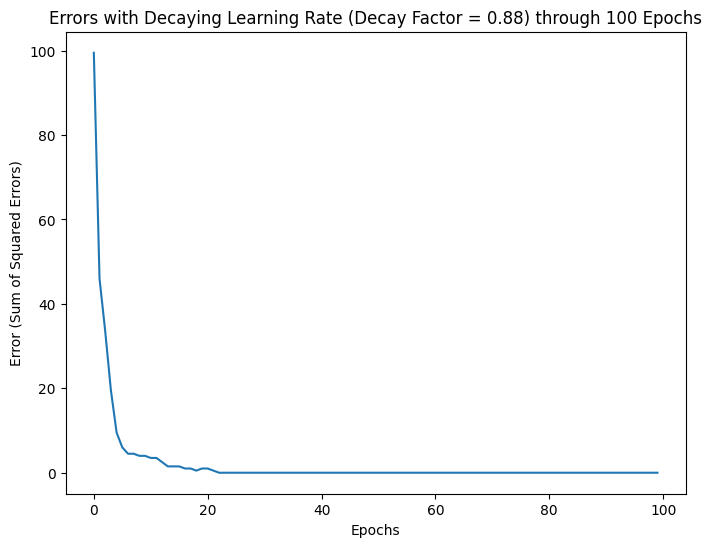

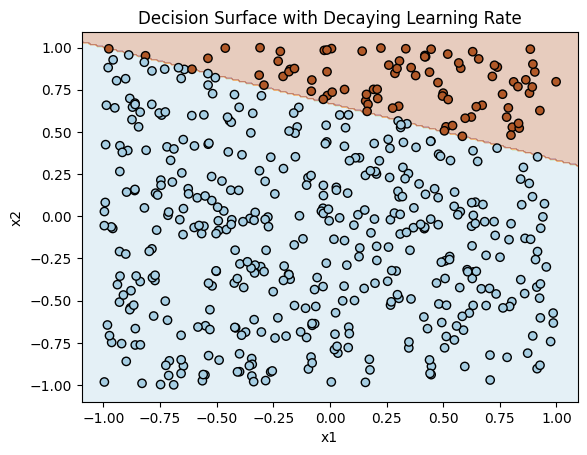

In [169]:
# Part 2 (a) - Decaying Learning Rates
model = PerceptronDeltaRule(learning_rate=0.1)
errors_with_decay = model.train_batch_with_decay(X, y, epochs=100, decay_factor=0.88)

def plot_errors(errors, title):
  plt.figure(figsize=(8, 6))
  plt.plot(errors)
  plt.xlabel("Epochs")
  plt.ylabel("Error (Sum of Squared Errors)")
  plt.title(f'{title} through 100 Epochs')
  plt.show()

# Plot errors
plot_errors(errors_with_decay, "Errors with Decaying Learning Rate (Decay Factor = 0.88)")

# Plot decision surface for decaying learning rates
model.plot_decision_surface(X, y, title="Decision Surface with Decaying Learning Rate")

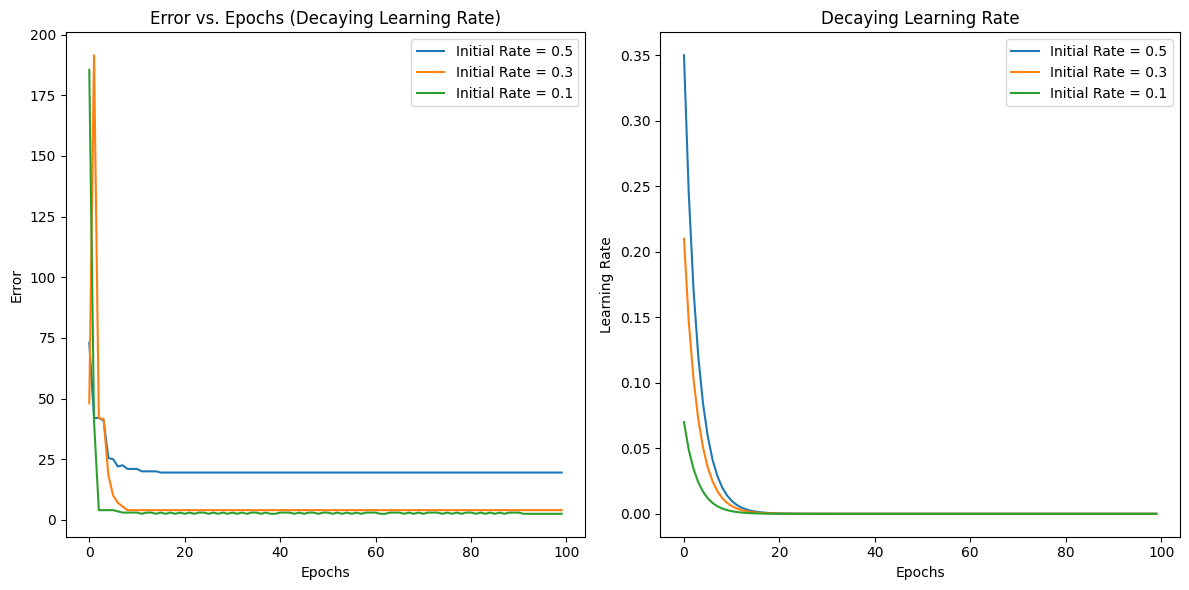

In [176]:
# Test different initial learning rates with decay
initial_lr = [0.5, 0.3, 0.1]
decay_factor = 0.7

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for initial_rate in initial_lr:
    perceptron = PerceptronDeltaRule(learning_rate=initial_rate)
    errors = perceptron.train_batch_with_decay(X, y, epochs=100, decay_factor=decay_factor)
    plt.plot(errors, label=f'Initial Rate = {initial_rate}')

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs. Epochs (Decaying Learning Rate)")
plt.legend()

plt.subplot(1, 2, 2)
for initial_rate in initial_lr:
    perceptron = PerceptronDeltaRule(learning_rate=initial_rate)
    perceptron.train_batch_with_decay(X, y, epochs=100, decay_factor=decay_factor)
    plt.plot(perceptron.learning_rates_history, label=f'Initial Rate = {initial_rate}')

plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Decaying Learning Rate")
plt.legend()
plt.tight_layout()
plt.show()

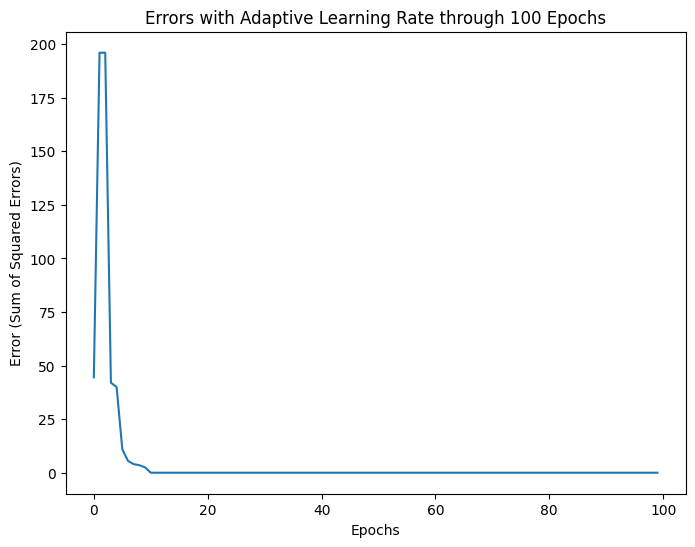

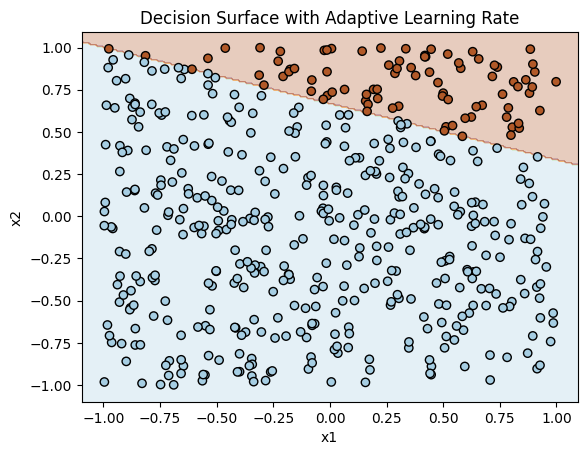

In [171]:
# Problem 2: b) Adaptive Learning Rates
initial_rate = 0.5
threshold = 0.03
d = 0.9
D = 1.02
perceptron = PerceptronDeltaRule(learning_rate=initial_rate)
errors_adaptive = perceptron.train_with_adaptive_rates(X, y, epochs=100, initial_rate=initial_rate, threshold=threshold, d=d, D=D)

plot_errors(errors_adaptive, "Errors with Adaptive Learning Rate" )

# Plot decision surface for adaptive learning rates
perceptron.plot_decision_surface(X, y, title="Decision Surface with Adaptive Learning Rate")

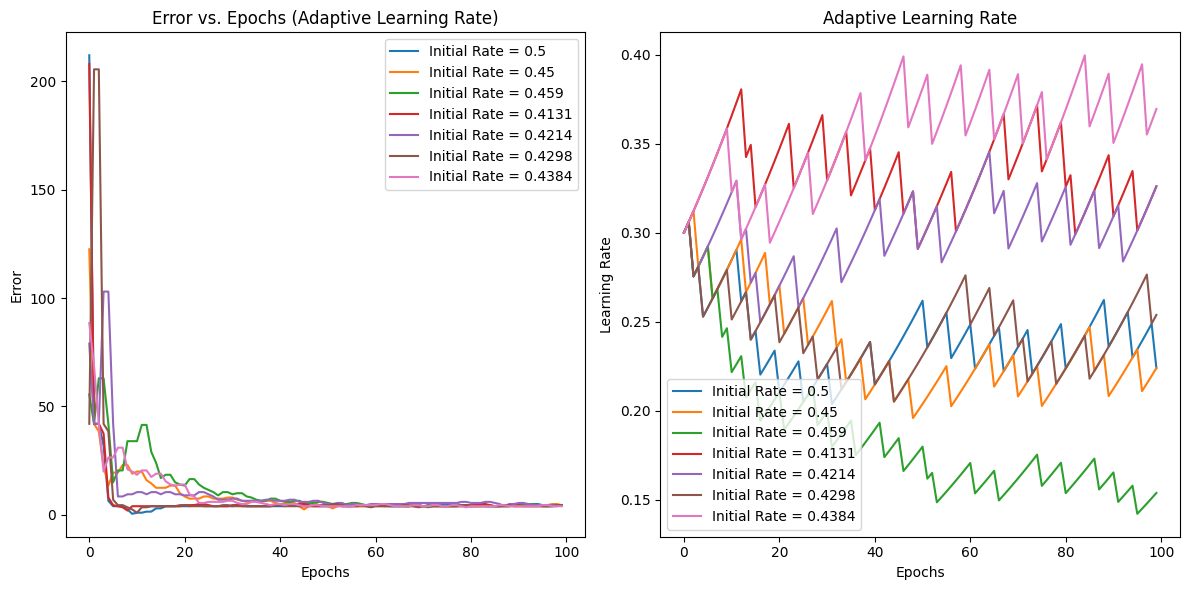

In [178]:
# Test different initial conditions for adaptive rate
initial_lr = [0.5, 0.45, 0.4590, 0.4131, 0.4214, 0.4298, 0.4384]
threshold = 0.03
decrease_factor = 0.9
increase_factor = 1.02

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
for initial_rate in initial_lr:
    perceptron = PerceptronDeltaRule(learning_rate=initial_rate)
    errors = perceptron.train_with_adaptive_rates(X, y, epochs=100, threshold=threshold, d=decrease_factor, D=increase_factor)
    plt.plot(errors, label=f'Initial Rate = {initial_rate}')

plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("Error vs. Epochs (Adaptive Learning Rate)")
plt.legend()

plt.subplot(1, 2, 2)
for initial_rate in initial_lr:
    perceptron = PerceptronDeltaRule(learning_rate=initial_rate)
    perceptron.train_with_adaptive_rates(X, y, epochs=100, threshold=threshold, d=decrease_factor, D=increase_factor)
    plt.plot(perceptron.learning_rates_history, label=f'Initial Rate = {initial_rate}')

plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.title("Adaptive Learning Rate")
plt.legend()
plt.tight_layout()
plt.show()

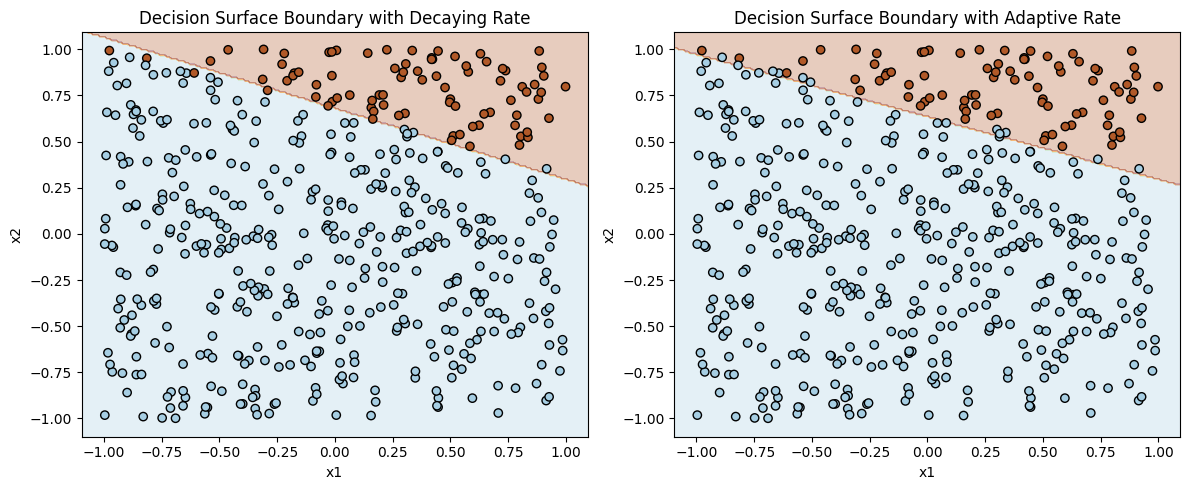

In [174]:
# Compare final decision boundaries
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Decaying Rate
plt.sca(axes[0])
final_decay_lr = 0.5
perceptron_decay = PerceptronDeltaRule(learning_rate=final_decay_lr)
perceptron_decay.train_batch_with_decay(X, y, epochs=100)

x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = perceptron_decay.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[0].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
axes[0].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
axes[0].set_title("Decision Surface Boundary with Decaying Rate")
axes[0].set_xlabel("x1")
axes[0].set_ylabel("x2")

# Adaptive Rate
plt.sca(axes[1])
final_adap_lr = 0.5
perceptron_adaptive = PerceptronDeltaRule(learning_rate=final_adap_lr)
perceptron_adaptive.train_with_adaptive_rates(X, y, epochs=100)

Z = perceptron_adaptive.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

axes[1].contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
axes[1].scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
axes[1].set_title("Decision Surface Boundary with Adaptive Rate")
axes[1].set_xlabel("x1")
axes[1].set_ylabel("x2")

plt.tight_layout()
plt.show()